In [84]:
import numpy as np
import torch
import torch as t
from torch.autograd import Variable
import torchvision as tv
import torchvision.transforms as transforms
from torchvision.transforms import ToPILImage

from __future__ import print_function

### numpy pytorch 实现梯度下降法

In [85]:
N, D_in, H, D_out = 1, 4, 4, 2


x = np.random.randn(N, D_in)
y = np.random.randn(N, D_out)


w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

learning_rate = 1e-6
for t in range(1):
    
    h = x.dot(w1)#.dot 矩阵积
    print('x维度 x_shape:',x.shape)
    print('w1维度 w1_shape:',w1.shape)
    print('隐层维度 h_shape:',h.shape)
    h_relu = np.maximum(h, 0)
    print('relu层维度 h_relu_shape:',h_relu.shape)
    print('w2维度 w2_shape:',w2.shape)
    y_pred = h_relu.dot(w2)
    print('预测值维度 y_pred_shape:',y_pred.shape)

    # 计算并显示loss（损失）
    loss = np.square(y_pred - y).sum()
    print('loss:',t, loss)

    # 反向传播，计算w1、w2对loss的梯度
    grad_y_pred = 2.0 * (y_pred - y)
    print('损失函数梯度 grad_y_pred:',grad_y_pred.shape)
    grad_w2 = h_relu.T.dot(grad_y_pred)
    print('w2梯度 grad_w2_shape:',grad_w2.shape)
    grad_h_relu = grad_y_pred.dot(w2.T)
    print('h_relu梯度 grad_h_relu_shape：',grad_h_relu.shape)
    grad_h = grad_h_relu.copy()
    grad_h[h < 0] = 0
    grad_w1 = x.T.dot(grad_h)
    print('w1梯度 grad_w1_shape：',grad_w1.shape)
    # 更新权重
    w1 -= learning_rate * grad_w1
    w2 -= learning_rate * grad_w2

x维度 x_shape: (1, 4)
w1维度 w1_shape: (4, 4)
隐层维度 h_shape: (1, 4)
relu层维度 h_relu_shape: (1, 4)
w2维度 w2_shape: (4, 2)
预测值维度 y_pred_shape: (1, 2)
loss: 0 35.69235444874203
损失函数梯度 grad_y_pred: (1, 2)
w2梯度 grad_w2_shape: (4, 2)
h_relu梯度 grad_h_relu_shape： (1, 4)
w1梯度 grad_w1_shape： (4, 4)


### pytorch 自动求导

构建Tensor时添加参数requires_grad=True

In [86]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu') 

# N是批大小；D_in是输入维度；
# H是隐藏层维度；D_out是输出维度  
N, D_in, H, D_out = 64, 1000, 100, 10

# 产生随机输入和输出数据
x = torch.randn(N, D_in, device=device)
y = torch.randn(N, D_out, device=device)

# 产生随机权重tensor，将requires_grad设置为True意味着我们希望在反向传播时候计算这些值的梯度
w1 = torch.randn(D_in, H, device=device, requires_grad=True)
w2 = torch.randn(H, D_out, device=device, requires_grad=True)

learning_rate = 1e-6
for t in range(500):
    y_pred = x.mm(w1).clamp(min=0).mm(w2)
    '''torch.clamp(input, min, max, out=None) → Tensor
    
          | min, if x_i < min
    y_i = | x_i, if min <= x_i <= max
          | max, if x_i > max
          
    '''

    print('old w1[0]:',w1[0][0])
    print('old w2[0]:',w2[0][0])
    loss = (y_pred - y).pow(2).sum()
    print(t, loss.item())


    loss.backward()


    # 使用梯度下降更新权重。对于这一步，我们只想对w1和w2的值进行原地改变；不想为更新阶段构建计算图，
    # 所以我们使用torch.no_grad()上下文管理器防止PyTorch为更新构建计算图
    with torch.no_grad():
        w1 -= learning_rate * w1.grad
        w2 -= learning_rate * w2.grad
        print('new w1[0]:',w1[0][0])
        print('new w2[0]:',w2[0][0])
        print('w1.gred before clean ',w1.grad[0][0])
        # 反向传播之后手动置零梯度
        w1.grad.zero_()
        w2.grad.zero_()
        print('w1.gred after clean ',w1.grad[0][0])

old w1[0]: tensor(0.7478, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.6368, grad_fn=<SelectBackward>)
0 34380824.0
new w1[0]: tensor(0.7420, requires_grad=True)
new w2[0]: tensor(0.3704, requires_grad=True)
w1.gred before clean  tensor(5781.1064)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7420, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.3704, grad_fn=<SelectBackward>)
1 32981862.0
new w1[0]: tensor(0.7398, requires_grad=True)
new w2[0]: tensor(0.6776, requires_grad=True)
w1.gred before clean  tensor(2189.9116)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7398, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.6776, grad_fn=<SelectBackward>)
2 35856876.0
new w1[0]: tensor(0.7354, requires_grad=True)
new w2[0]: tensor(0.3325, requires_grad=True)
w1.gred before clean  tensor(4444.4629)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7354, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.3325, grad_fn=<SelectBackward>)
3 36037712.0
new w1[0]: tensor(0.7337, requires_grad=

old w1[0]: tensor(0.7026, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4133, grad_fn=<SelectBackward>)
29 78381.78125
new w1[0]: tensor(0.7020, requires_grad=True)
new w2[0]: tensor(0.4124, requires_grad=True)
w1.gred before clean  tensor(532.2345)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7020, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4124, grad_fn=<SelectBackward>)
30 70558.6328125
new w1[0]: tensor(0.7015, requires_grad=True)
new w2[0]: tensor(0.4116, requires_grad=True)
w1.gred before clean  tensor(504.6916)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7015, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4116, grad_fn=<SelectBackward>)
31 63623.09765625
new w1[0]: tensor(0.7010, requires_grad=True)
new w2[0]: tensor(0.4109, requires_grad=True)
w1.gred before clean  tensor(478.6253)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.7010, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4109, grad_fn=<SelectBackward>)
32 57451.56640625
new w1[0]: tensor(0.7006, r

w1.gred before clean  tensor(129.4931)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6943, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4052, grad_fn=<SelectBackward>)
58 6048.72216796875
new w1[0]: tensor(0.6942, requires_grad=True)
new w2[0]: tensor(0.4052, requires_grad=True)
w1.gred before clean  tensor(123.3812)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6942, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4052, grad_fn=<SelectBackward>)
59 5610.90673828125
new w1[0]: tensor(0.6941, requires_grad=True)
new w2[0]: tensor(0.4053, requires_grad=True)
w1.gred before clean  tensor(117.5195)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6941, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4053, grad_fn=<SelectBackward>)
60 5208.11328125
new w1[0]: tensor(0.6940, requires_grad=True)
new w2[0]: tensor(0.4053, requires_grad=True)
w1.gred before clean  tensor(111.9705)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6940, grad_fn=<SelectBackward>)
old w2[0]: tensor(0

86 902.20947265625
new w1[0]: tensor(0.6923, requires_grad=True)
new w2[0]: tensor(0.4078, requires_grad=True)
w1.gred before clean  tensor(33.1365)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6923, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4078, grad_fn=<SelectBackward>)
87 848.4454345703125
new w1[0]: tensor(0.6923, requires_grad=True)
new w2[0]: tensor(0.4079, requires_grad=True)
w1.gred before clean  tensor(31.6727)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6923, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4079, grad_fn=<SelectBackward>)
88 798.177734375
new w1[0]: tensor(0.6923, requires_grad=True)
new w2[0]: tensor(0.4080, requires_grad=True)
w1.gred before clean  tensor(30.2763)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6923, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4080, grad_fn=<SelectBackward>)
89 751.14111328125
new w1[0]: tensor(0.6922, requires_grad=True)
new w2[0]: tensor(0.4081, requires_grad=True)
w1.gred before clean  tensor(28.94

w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6918, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4106, grad_fn=<SelectBackward>)
115 172.18374633789062
new w1[0]: tensor(0.6918, requires_grad=True)
new w2[0]: tensor(0.4106, requires_grad=True)
w1.gred before clean  tensor(9.3786)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6918, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4106, grad_fn=<SelectBackward>)
116 163.2440643310547
new w1[0]: tensor(0.6918, requires_grad=True)
new w2[0]: tensor(0.4107, requires_grad=True)
w1.gred before clean  tensor(8.9923)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6918, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4107, grad_fn=<SelectBackward>)
117 154.80064392089844
new w1[0]: tensor(0.6918, requires_grad=True)
new w2[0]: tensor(0.4108, requires_grad=True)
w1.gred before clean  tensor(8.6284)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6918, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4108, grad_fn=<SelectBackward>)
1

143 41.211181640625
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4124, requires_grad=True)
w1.gred before clean  tensor(2.9633)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4124, grad_fn=<SelectBackward>)
144 39.236549377441406
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4125, requires_grad=True)
w1.gred before clean  tensor(2.8420)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4125, grad_fn=<SelectBackward>)
145 37.35990905761719
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4125, requires_grad=True)
w1.gred before clean  tensor(2.7317)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4125, grad_fn=<SelectBackward>)
146 35.57772445678711
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4126, requires_grad=True)
w1.gred before clean  tens

w1.gred before clean  tensor(0.9356)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4135, grad_fn=<SelectBackward>)
172 10.289016723632812
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4135, requires_grad=True)
w1.gred before clean  tensor(0.8980)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4135, grad_fn=<SelectBackward>)
173 9.819246292114258
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4135, requires_grad=True)
w1.gred before clean  tensor(0.8584)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4135, grad_fn=<SelectBackward>)
174 9.371456146240234
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4136, requires_grad=True)
w1.gred before clean  tensor(0.8239)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor

old w2[0]: tensor(0.4141, grad_fn=<SelectBackward>)
200 2.834585428237915
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4141, requires_grad=True)
w1.gred before clean  tensor(0.2530)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4141, grad_fn=<SelectBackward>)
201 2.7088940143585205
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4141, requires_grad=True)
w1.gred before clean  tensor(0.2396)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4141, grad_fn=<SelectBackward>)
202 2.588787317276001
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4141, requires_grad=True)
w1.gred before clean  tensor(0.2281)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4141, grad_fn=<SelectBackward>)
203 2.474078416824341
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(

new w2[0]: tensor(0.4144, requires_grad=True)
w1.gred before clean  tensor(0.0438)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4144, grad_fn=<SelectBackward>)
229 0.771088719367981
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4144, requires_grad=True)
w1.gred before clean  tensor(0.0393)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4144, grad_fn=<SelectBackward>)
230 0.737546443939209
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4144, requires_grad=True)
w1.gred before clean  tensor(0.0321)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4144, grad_fn=<SelectBackward>)
231 0.7054869532585144
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4144, requires_grad=True)
w1.gred before clean  tensor(0.0310)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.691

w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4145, grad_fn=<SelectBackward>)
257 0.22466257214546204
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4145, requires_grad=True)
w1.gred before clean  tensor(-0.0191)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4145, grad_fn=<SelectBackward>)
258 0.21510513126850128
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4145, requires_grad=True)
w1.gred before clean  tensor(-0.0183)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4145, grad_fn=<SelectBackward>)
259 0.20595873892307281
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4145, requires_grad=True)
w1.gred before clean  tensor(-0.0181)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4145, grad_fn=<SelectBackw

old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4146, grad_fn=<SelectBackward>)
285 0.0668121948838234
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4146, requires_grad=True)
w1.gred before clean  tensor(-0.0283)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4146, grad_fn=<SelectBackward>)
286 0.06400805711746216
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4146, requires_grad=True)
w1.gred before clean  tensor(-0.0318)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4146, grad_fn=<SelectBackward>)
287 0.06132877618074417
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4146, requires_grad=True)
w1.gred before clean  tensor(-0.0314)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4146, grad_fn=<SelectBackward>)
288 0.058769747614860535
ne

old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
313 0.02033260278403759
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0248)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
314 0.01949072815477848
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0244)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
315 0.01868683472275734
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0237)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
316 0.01792408712208271
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0

341 0.006463074591010809
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0192)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
342 0.006213710643351078
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0183)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
343 0.005975247826427221
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0191)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
344 0.005743937101215124
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred be

new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0135)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
370 0.002174831461161375
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0133)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
371 0.0021008409094065428
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0127)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
372 0.0020254747942090034
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0

new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0106)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
398 0.0008809894789010286
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0106)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
399 0.0008567065233364701
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0111)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
400 0.0008317919564433396
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.

new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0069)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
426 0.0004151290631853044
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0074)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
427 0.00040566851384937763
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0078)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
428 0.0003951519320253283
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0

new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0077)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
454 0.00022234868083614856
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0076)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
455 0.00021801391267217696
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0073)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
456 0.00021377555094659328
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(

481 0.00013418008165899664
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0074)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
482 0.0001316038251388818
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0073)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
483 0.00012977217556908727
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.gred before clean  tensor(-0.0071)
w1.gred after clean  tensor(0.)
old w1[0]: tensor(0.6916, grad_fn=<SelectBackward>)
old w2[0]: tensor(0.4147, grad_fn=<SelectBackward>)
484 0.00012775271898135543
new w1[0]: tensor(0.6916, requires_grad=True)
new w2[0]: tensor(0.4147, requires_grad=True)
w1.

### pytorch 线性回归

In [87]:
# train data
x_data = Variable(torch.Tensor([[1.0], [2.0], [3.0]]))
#x_data = torch.randn( 3,1,requires_grad=True)
y_data = Variable(torch.Tensor([[2.0], [4.0], [6.0]]))
#y_data = torch.randn(3,1,requires_grad=True)
print(x_data)
print(y_data)

tensor([[1.],
        [2.],
        [3.]])
tensor([[2.],
        [4.],
        [6.]])


In [88]:
class Model(torch.nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 3) 
        '''
        class torch.nn.Linear（in_features，out_features，bias = True )
        对传入数据应用线性变换：y = A x+ b
        '''

    def forward(self, x):
        y_pred = self.linear(x)
        return y_pred

# our model
model = Model()

criterion = torch.nn.MSELoss(size_average=False) # Defined loss function
optimizer = torch.optim.SGD(model.parameters(), lr=0.01) # Defined optimizer

# Training: forward, loss, backward, step
# Training loop
for epoch in range(50):
    # Forward pass
    y_pred = model(x_data)

    # Compute loss
    loss = criterion(y_pred, y_data)
    print(epoch, loss.item())

    # Zero gradients
    optimizer.zero_grad()
    # perform backward pass
    loss.backward()
    # update weights
    optimizer.step()

# After training
hour_var = Variable(torch.Tensor([[1.0]]))
print(hour_var)
print("predict (after training)", 1, model.forward(hour_var).data[0][0])

D:\anaconda\lib\site-packages\torch\nn\_reduction.py:46: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))
D:\anaconda\lib\site-packages\torch\nn\modules\loss.py:443: UserWarning: Using a target size (torch.Size([3, 1])) that is different to the input size (torch.Size([3, 3])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


0 262.8558654785156
1 117.80699157714844
2 53.223976135253906
3 24.462249755859375
4 11.647305488586426
5 5.931568622589111
6 3.3763561248779297
7 2.22827410697937
8 1.7067582607269287
9 1.464321494102478
10 1.3462709188461304
11 1.283738136291504
12 1.246064305305481
13 1.2195981740951538
14 1.1982605457305908
15 1.179343819618225
16 1.161639928817749
17 1.1446090936660767
18 1.1280096769332886
19 1.1117318868637085
20 1.0957245826721191
21 1.0799640417099
22 1.0644372701644897
23 1.0491373538970947
24 1.0340585708618164
25 1.019196629524231
26 1.0045491456985474
27 0.9901120662689209
28 0.975882351398468
29 0.9618576169013977
30 0.9480340480804443
31 0.9344094395637512
32 0.9209805130958557
33 0.9077445864677429
34 0.8946987390518188
35 0.8818402290344238
36 0.869167149066925
37 0.8566758036613464
38 0.8443641066551208
39 0.8322291374206543
40 0.8202686309814453
41 0.8084799647331238
42 0.7968609929084778
43 0.7854088544845581
44 0.774121105670929
45 0.7629959583282471
46 0.752030611

In [89]:
show = ToPILImage() # 可以把Tensor转成Image，方便可视化

In [91]:
 #第一次运行程序torchvision会自动下载CIFAR-10数据集，
# 大约100M，需花费一定的时间，
# 如果已经下载有CIFAR-10，可通过root参数指定

# 定义对数据的预处理
transform = transforms.Compose([
        transforms.ToTensor(), # 转为Tensor
        transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)), # 归一化
                             ])

# 训练集
trainset = tv.datasets.CIFAR10(
                    root='D:/ML_Study/', 
                    train=True, 
                    download=False,
                    transform=transform)

trainloader = torch.utils.data.DataLoader(
                    trainset, 
                    batch_size=4,
                    shuffle=True, 
                    num_workers=2)

# 测试集
testset = tv.datasets.CIFAR10(
                    'D:/ML_Study/',
                    train=False, 
                    download=False, 
                    transform=transform)

testloader = torch.utils.data.DataLoader(
                    testset,
                    batch_size=4, 
                    shuffle=False,
                    num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

ship


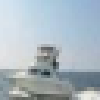

In [92]:
(data, label) = trainset[100]
print(classes[label])

# (data + 1) / 2是为了还原被归一化的数据
show((data + 1) / 2).resize((100, 100))

       ship        frog       truck       horse


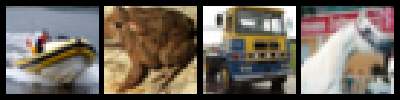

In [93]:
dataiter = iter(trainloader)
images, labels = dataiter.next() # 返回4张图片及标签
print(' '.join('%11s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid((images+1)/2)).resize((400,100))

In [94]:

import torch.nn as nn
import torch.nn.functional as F

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) 
        self.conv2 = nn.Conv2d(6, 16, 5)  
        self.fc1   = nn.Linear(16*5*5, 120)  
        self.fc2   = nn.Linear(120, 84)
        self.fc3   = nn.Linear(84, 10)

    def forward(self, x): 
        x = F.max_pool2d(F.relu(self.conv1(x)), (2, 2)) 
        x = F.max_pool2d(F.relu(self.conv2(x)), 2) 
        x = x.view(x.size()[0], -1) 
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)        
        return x


net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [95]:

from torch import optim
criterion = nn.CrossEntropyLoss() # 交叉熵损失函数
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [97]:
torch.set_num_threads(8)
for epoch in range(2):  
    
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        
        # 输入数据
        inputs, labels = data
        
        # 梯度清零
        optimizer.zero_grad()
        
        # forward + backward 
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()   
        
        # 更新参数 
        optimizer.step()
        
        # 打印log信息
        # loss 是一个scalar,需要使用loss.item()来获取数值，不能使用loss[0]
        running_loss += loss.item()
        if i % 2000 == 1999: # 每2000个batch打印一下训练状态
            print('[%d, %5d] loss: %.3f' \
                  % (epoch+1, i+1, running_loss / 2000))
            running_loss = 0.0
print('Finished Training')

[1,  2000] loss: 2.220
[1,  4000] loss: 1.883
[1,  6000] loss: 1.700
[1,  8000] loss: 1.603
[1, 10000] loss: 1.519
[1, 12000] loss: 1.500
[2,  2000] loss: 1.422
[2,  4000] loss: 1.382
[2,  6000] loss: 1.319
[2,  8000] loss: 1.330
[2, 10000] loss: 1.294
[2, 12000] loss: 1.263
Finished Training


实际的label:       cat     ship     ship    plane


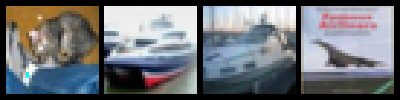

In [98]:

dataiter = iter(testloader)
images, labels = dataiter.next() # 一个batch返回4张图片
print('实际的label: ', ' '.join(\
            '%08s'%classes[labels[j]] for j in range(4)))
show(tv.utils.make_grid(images / 2 - 0.5)).resize((400,100))

In [100]:

# 计算图片在每个类别上的分数
outputs = net(images)
# 得分最高的那个类
_, predicted = torch.max(outputs.data, 1)

print('预测结果: ', ' '.join('%5s'\
            % classes[predicted[j]] for j in range(4)))

预测结果:    cat  ship  ship  ship


In [103]:
correct = 0 # 预测正确的图片数
total = 0 # 总共的图片数


# 由于测试的时候不需要求导，可以暂时关闭autograd，提高速度，节约内存
with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum()

print('10000张测试集中的准确率为: %d %%' % (100 * correct / total))

10000张测试集中的准确率为: 54 %
